In [21]:
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random

df = pd.read_csv('data/Price.csv')
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df_train = df.select_dtypes(include=['int', 'float'])
df_train

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


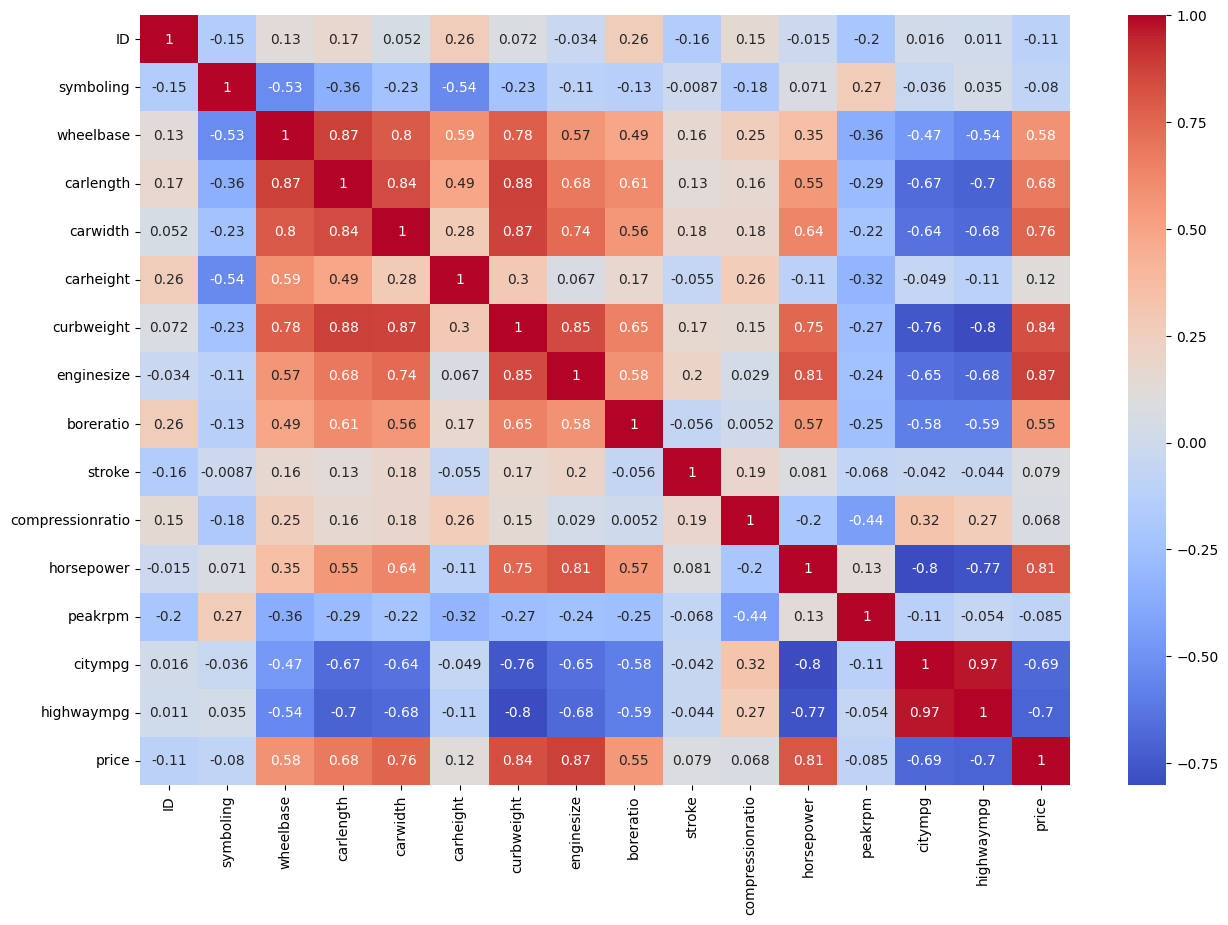

In [6]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
df_train = pd.DataFrame(df_train.corr().loc['price'][df_train.corr().loc['price'] >= 0.75])
df_train = df_train.drop(index=df_train.index[-1])
df_train

,price
carwidth,0.759325
curbweight,0.835305
enginesize,0.874145
horsepower,0.808139


[]

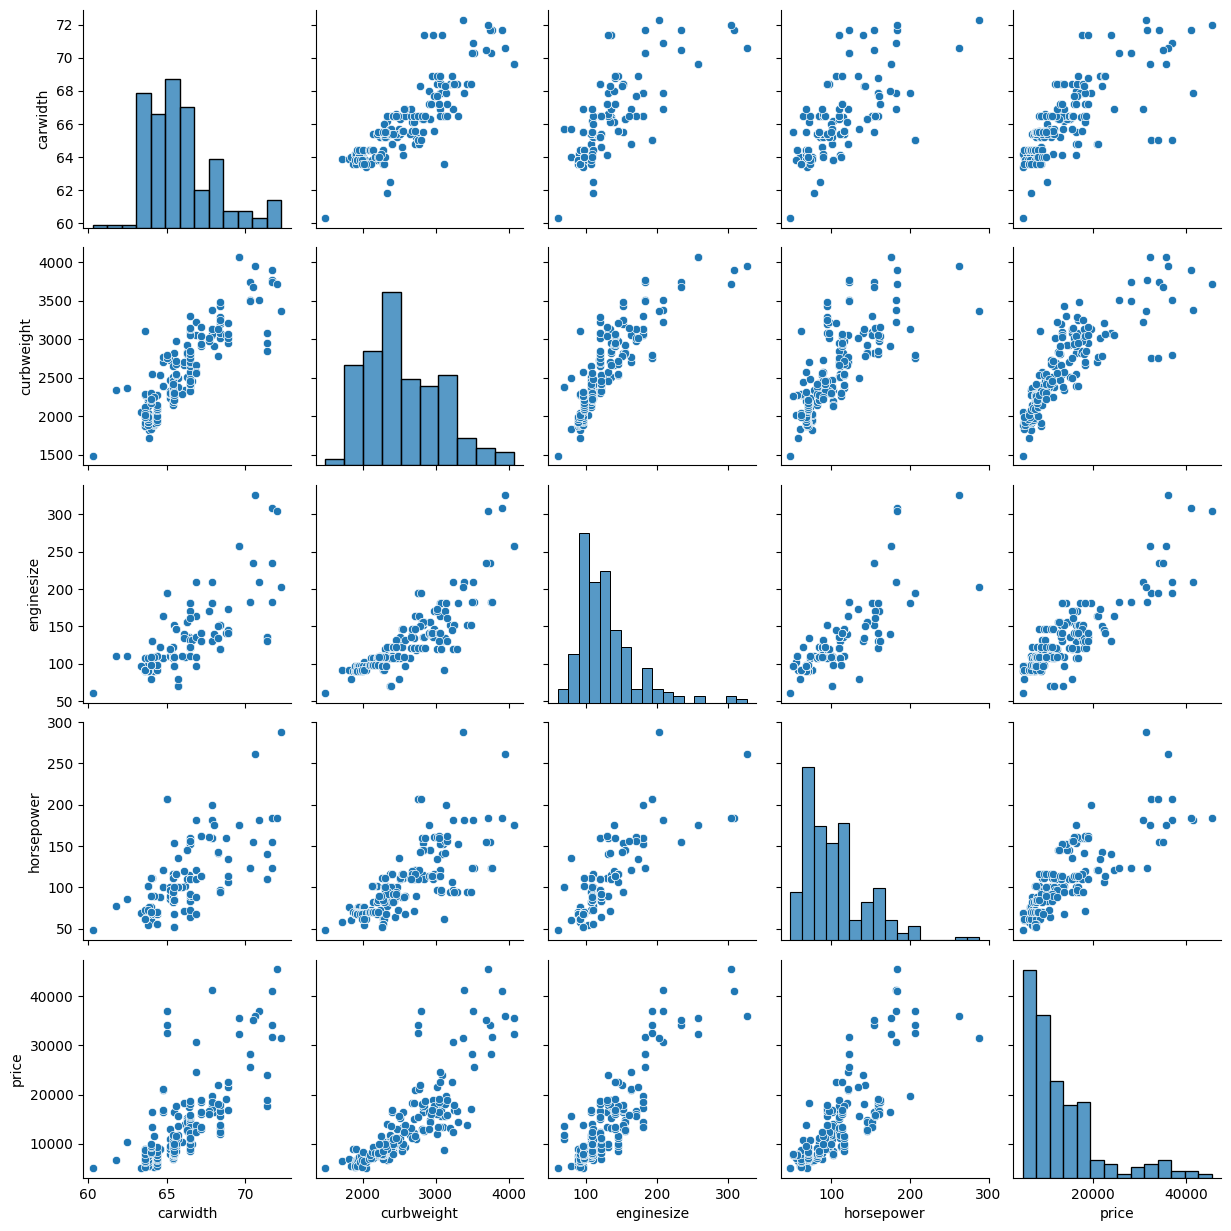

In [8]:
columns = df_train.index.tolist()
columns.append('price')
sns.pairplot(df[columns])
plt.plot()

In [9]:
df[['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price']]

,carwidth,curbweight,enginesize,horsepower,price
0,64.1,2548,130,111,13495.0
1,64.1,2548,130,111,16500.0
2,65.5,2823,152,154,16500.0
3,66.2,2337,109,102,13950.0
4,66.4,2824,136,115,17450.0
...,...,...,...,...,...
200,68.9,2952,141,114,16845.0
201,68.8,3049,141,160,19045.0
202,68.9,3012,173,134,21485.0
203,68.9,3217,145,106,22470.0


In [20]:
X, y = df[['carwidth', 'curbweight', 'enginesize', 'horsepower']].to_numpy(), df['price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
X_train

array([[  66.1, 2700. ,  134. ,   72. ],
       [  68.4, 3075. ,  120. ,   95. ],
       [  63.6, 2280. ,   92. ,   62. ],
       [  63.8, 1971. ,   97. ,   69. ],
       [  65.2, 2289. ,  110. ,   86. ],
       [  63.8, 1967. ,   90. ,   68. ],
       [  63.6, 2120. ,  108. ,   73. ],
       [  68.4, 3252. ,  152. ,   95. ],
       [  66.3, 2811. ,  156. ,  145. ],
       [  63.6, 1874. ,   90. ,   70. ],
       [  67.7, 2976. ,  171. ,  161. ],
       [  63.8, 2017. ,  103. ,   55. ],
       [  66.5, 2326. ,  122. ,   92. ],
       [  63.8, 2024. ,   97. ,   69. ],
       [  66.3, 2507. ,  136. ,  110. ],
       [  65.6, 2540. ,  146. ,  116. ],
       [  65.7, 2380. ,   70. ,  101. ],
       [  65. , 2800. ,  194. ,  207. ],
       [  64.4, 1918. ,   92. ,   68. ],
       [  65.4, 2385. ,  108. ,   82. ],
       [  67.9, 3071. ,  181. ,  160. ],
       [  66.5, 2458. ,  122. ,   92. ],
       [  68. , 2910. ,  140. ,  175. ],
       [  66.5, 2480. ,  110. ,   73. ],
       [  63.9, 

In [195]:
rand = random.randint(0, len(X_test))

x = [X_test[rand].tolist()]
y = [y_test[rand].tolist()]

pred = model.predict(x)
print('y:    ', int(y[0]))
print('pred: ', int(pred))

mae = mean_absolute_error(y, pred)
print('\nmae:  ', int(mae))

y:     5151
pred:  -633

mae:   5784


In [196]:
rand

16

In [197]:
X_test[rand]

array([  60.3, 1488. ,   61. ,   48. ])

In [199]:
model.predict([X_test[rand].tolist()])

array([-633.86862651])

In [214]:
model.predict(X_test.tolist())

array([25823.02332068, 18798.77699226, 11334.76742652, 13652.30837798,
       23815.77993835,  6599.12018528,  7802.46460977,  7335.19707722,
       10675.00343923,  7226.64060698, 15081.06806466,  7218.23190669,
       15450.48629923, 12263.2566441 , 38044.53888245,  5681.6514918 ,
        -633.86862651, 18502.14899316, 11345.92408828, 10437.9185149 ,
       11826.44851215, 21497.84712486,  6557.88802453,  5031.44607823,
        5917.43609645, 26754.53473867, 15118.28157717, 16642.23203551,
        6617.67465762, 16390.71585492, 23331.30204951,  5872.08071962,
        6248.59370215, 21229.96272809,  8686.38978918, 23290.06988875,
       11699.08549336,  8108.76621743,  5735.19383592, 18693.87854067,
        9691.99556332])

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# Valores das quatro features (X1, X2, X3, X4)
X1 = X_test[:, 0]


# Coeficientes estimados para as quatro features
w = model.coef_[0]
b = model.intercept_[0]

# Valores previstos (y_pred) usando os coeficientes e as features
y_pred = model.predict(X1.tolist())


# Plotar a relação entre valores previstos e cada feature em subplots separados
plt.scatter(y_pred, X1)
#plt.plot(y_pred, y_pred, color='red')
plt.scatter(y_test, X1)


plt.show()


IndexError: invalid index to scalar variable.

In [233]:
model.intercept_

-48568.716951955